# COMP1801 Tutorial Week 3 - Multivariable Regression Models
*Dr Peter Soar - 2024/25*

This tutorial will be expanding on the work we did in week two on Linear Regression: revising the vectorised formulation, showing how we can fit multivariable and polynomial models.

For this tutorial, read through and try to understand the text and code examples I have provided (ask your tutor if you have any questions) and there will be a selection of exercises. Attempt these exercises on your own, but do ask your tutor for help if you get stuck.



##0. Do not forget to import all the Python Libraries being used!

In [1]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import time # We will be using this to time the efficiency of vectorisation
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from mpl_toolkits import mplot3d # Used to make a 3D plot used to demonstrate multidimensional relationships.
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model
# from google.colab import files # We will be importing a csv file I have provided for one section.

# 1. Vectorization
We can represent our algorithm more concisely using vectorization, which uses vectors, matrices and linear-algebra operations to represent the operations we need to perform when fitting and predicting with our models.

Not only does this simplify the implementation of various tasks, but this vectorised form can also improve the speed of some operations.

Note: if you feel very comfortable with vectors and linear algebra you might want to skip this section

## 1.1. Notation revision

- Bold lower case letters (e.g. $\boldsymbol{v}$) indicate a column vector
$$
\boldsymbol{v}
=
\begin{bmatrix}
v_{0} \\
v_{1} \\
\vdots \\
v_{m-1} \\
\end{bmatrix}
$$
- Bold upper case letters(e.g. $\boldsymbol{A}$) indicate a ($m \times n$) matrix
$$
\boldsymbol{A}
= \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1} \\
\end{bmatrix}
$$
- The maximum rows (data points for ML) and columns (features for ML) are represented by $m$ and $n$ respectively.



## 1.2. Vector multiplication for linear model prediction

A key operation that vectorisation aids is simplifying the calculations when making predictions from our linear models.

For a single observed set of feature data we can obtain a prediction using $\hat{y} =\boldsymbol{x} \boldsymbol{\theta}$ where we have

$$
\boldsymbol{x} =
\begin{bmatrix}
x_{0} &
x_{1} &
\dots &
x_{m-1} \\
\end{bmatrix},
\boldsymbol{\theta} :=
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{m-1} \\
\end{bmatrix}
$$

Allowing us to work out the single value for the prediction by using matrix multiplication rules:
$$
\hat{y} = \boldsymbol{x} \boldsymbol{\theta} = \sum_{i=0}^{m-1} x_{i} \theta_{i} = x_{0} \theta_{0} + x_{1} \theta_{1} + \cdots+ x_{m-1} \theta_{m-1}
$$


Let us take a simple example where we define $\boldsymbol{x}$ and $\boldsymbol{\theta}$ by
$$
\boldsymbol{x} =
\begin{bmatrix}
1 &
3 \\
\end{bmatrix},
\boldsymbol{\theta} =
\begin{bmatrix}
-1 \\
2 \\
\end{bmatrix}
$$

Our prediction for this data point would be:

$$
\hat{y} = \boldsymbol{x} \boldsymbol{\theta} = \sum_{i=0}^{1} x_{i} \theta_{i} = x_{0} \theta_{0} + x_{1} \theta_{1} = 1 \times -1 + 3 \times 2 = 5
$$

Let's check this using the computer.

In the following, we regard $\boldsymbol{x}$ and $\boldsymbol{\theta}$ as 2D `np.array`s with the size of $1 \times 2$ and $2 \times 1$ respectively. $\boldsymbol{x} \boldsymbol{\theta}$ is given by the matrix multiplication of $\boldsymbol{x}$ and $\boldsymbol{\theta}$. In NumPy matrix multiplication is given by `@` (or you can use dot product)

In [2]:
x = np.array([[1, 3]])
th = np.array([[-1],[2]])

y_pred = x @ th
print(y_pred)

[[5]]


## 1.3. Matrix multiplication for linear model prediction

Of course, usually we want to make more than one prediction at a time, which means multiplying the parameters vector by the entire feature matrix such that our predictions are now a vector defined by $\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$.

where
$$
\boldsymbol{X}
=
\begin{bmatrix}
1 & x_{1}^{(0)} & x_{2}^{(0)} & \cdots & x_{n-1}^{(0)} \\
1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n-1}^{(1)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1}^{(m-1)} & x_{2}^{(m-1)} & \cdots & x_{n-1}^{(m-1)} \\
\end{bmatrix},
\boldsymbol{\theta}
=
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n-1} \\
\end{bmatrix},
\hat{\boldsymbol{y}}
=
\begin{bmatrix}
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix},
$$

This means that for each $i = 0, 1, \dots, m-1$ the prediction will be:
$$
\hat{y}^{(i)} = \theta_{0} + x_{1}^{(i)} \theta_{1} + x_{2}^{(i)} \theta_{2} + \dots + x_{n-1}^{(i)} \theta_{n-1}.
$$

### 1.3.1 Exercise 1
Define $\boldsymbol{X}$ and $\boldsymbol{\theta}$ by
$$
\boldsymbol{X} =
\begin{bmatrix}
1 & 0 \\
1 & 3 \\
1 & -2 \\
\end{bmatrix},
\boldsymbol{\theta} =
\begin{bmatrix}
-1 \\
2 \\
\end{bmatrix}.
$$

Find the prediction vector $\hat{\boldsymbol{y}}$ using matrix multiplication.

To do this we define $\boldsymbol{X}$ and $\boldsymbol{\theta}$ as 2D `np.array`s with the size of $3 \times 2$ and $2 \times 1$, respectively. $\boldsymbol{X} \boldsymbol{\theta}$ is given by the matrix multiplication of $\boldsymbol{X}$ and $\boldsymbol{\theta}$. In NumPy, the matrix multiplication is given by `@`.
Store the results in `y_pred`.

In [3]:
##############################################################
# Your code here
##############################################################
x = np.array([
     [1, 0],
     [1, 3],
     [1, -2],
])
th = np.array([
     [-1],
     [2],
])

y_pred = x @ th
print(y_pred)


[[-1]
 [ 5]
 [-5]]


## 1.4 Efficiency of the vectorization.
Vectorization not only simplify the mathematical notation, but also makes calculation more efficient computationally.

In the following, we compare the implementations of the linear regression using the vectorized form and `for` loops.

First, we define the two implementations.

In [4]:
def linear_prediction_by_vectorization(X, th):
  y_pred = X @ th
  return y_pred

def linear_prediction_by_for_loops(X, th):
  m, n = X.shape
  y_pred = np.zeros([m, 1], dtype=float)
  for i in range(m):
    for j in range(n):
      y_pred[i] += X[i, j] * th[j, 0]
  return y_pred

In the following, we measure the elapsed time of both implementations, see that the vectorised code is almost twice as fast even on this tiny example. For larger datasets this difference should only become more pronounced.

In [5]:
x = np.array([[1, 3]])
th = np.arange(x.shape[-1]).reshape([-1, 1]) # An example of the parameter vector.

execution_start_time = time.time()
y_pred_vec = linear_prediction_by_vectorization(x, th)
execution_end_time = time.time()

elapsed_time_by_vectorization = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by vectorization: {elapsed_time_by_vectorization * 1000}ms.')

execution_start_time = time.time()
y_pred_for = linear_prediction_by_for_loops(x, th)
execution_end_time = time.time()

elapsed_time_by_for_loops = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by `for` loops: {elapsed_time_by_for_loops * 1000}ms.')




Elapsed time of linear prediction by vectorization: 0.041961669921875ms.
Elapsed time of linear prediction by `for` loops: 0.05316734313964844ms.


### 1.4.1 Exercise 2

Apply both methods above (vectorised and loop based prediction) with the California housing data to use the 'Median Income' to predict the 'House Value' (target). Start with a small sample (say 200) for your training data (you don't need to split it into training/new for this exercise), then increase to larger values (the dataset has just over 20000 entries) to see how the timings change.

Note: you may want to use previous tutorials (or examples from later on in this tutorial) for reference for how to correctly load in and process the data for the model. As this is a timing exercise, we don't actually need to fit the model and can use any values for our hypothesis vector $\boldsymbol{\theta}$.

In [6]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# Use only one feature to start with for univariate linear regression - The Median Income
Xy_df = df[['MedInc','MedHouseVal']]

# So for this task we are going to be predicting the property value based on the Median Income

# prepare NumPy ndarrays
X_raw = np.array(Xy_df[['MedInc']])
y_raw = np.array(Xy_df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 200 # This is the data that will be used to train our model.

# Split the feature data into training data
X = X_raw[:n] # This will select the data points from 0 to the number defined in n (200 in this case)

th = np.arange(X.shape[-1]).reshape([-1, 1]) # An example of the parameter vector.

execution_start_time = time.time()
y_pred_vec = linear_prediction_by_vectorization(X, th)
execution_end_time = time.time()

elapsed_time_by_vectorization = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by vectorization: {elapsed_time_by_vectorization * 1000}ms.')

execution_start_time = time.time()
y_pred_for = linear_prediction_by_for_loops(X, th)
execution_end_time = time.time()

elapsed_time_by_for_loops = execution_end_time - execution_start_time

print(f'Elapsed time of linear prediction by `for` loops: {elapsed_time_by_for_loops * 1000}ms.')

Elapsed time of linear prediction by vectorization: 0.04124641418457031ms.
Elapsed time of linear prediction by `for` loops: 0.2911090850830078ms.


#2. Multivariable regression

In tutorial 2 we were primarily working with simple univariate linear regression where we fit a model predicting:
$$\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$$

where the vectorised form our univariate linear model will look like this:
$$
\begin{bmatrix}
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix} = \begin{bmatrix}
1 & x_{1}^{(0)}  \\
1 & x_{1}^{(1)}  \\
\vdots & \vdots  \\
1 & x_{1}^{(m-1)} \\
\end{bmatrix}\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\end{bmatrix}
$$

Where the column of 1's are needed to correspond with the constant parameter $\theta_0$ used by the model (Note: we don't have to account for this when using sklearn `fit` model functionality).

For multivariate linear regression we can still summarise our model as $\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{\theta}$ in matrix form, but when expanded the feature matrix and parameter vector expand to account for the extra features:
$$
\begin{bmatrix}
\hat{y}^{(0)} \\
\hat{y}^{(1)} \\
\vdots \\
\hat{y}^{(m-1)} \\
\end{bmatrix} = \begin{bmatrix}
1 & x_{1}^{(0)} & x_{2}^{(0)} & \cdots & x_{n-1}^{(0)} \\
1 & x_{1}^{(1)} & x_{2}^{(1)} & \cdots & x_{n-1}^{(1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1}^{(m-1)} & x_{2}^{(m-1)} & \cdots & x_{n-1}^{(m-1)} \\
\end{bmatrix}\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n-1} \\
\end{bmatrix}
$$


Multivariate models such as this are far more common as the accuracy that can be obtained using a single variable is usually quite limited in the real world, as there are often many relationships between many features which dictate the full behaviour observed in the target values being predicted during supervised learning.

## 2.1. Univariate Example Revision



Below I am going to reproduce the code I provided in week 2 showing how to fit a univariate regression model of the median income vs the house value for the california housing dataset - hopefully you all recognise this code and understand all the functions.

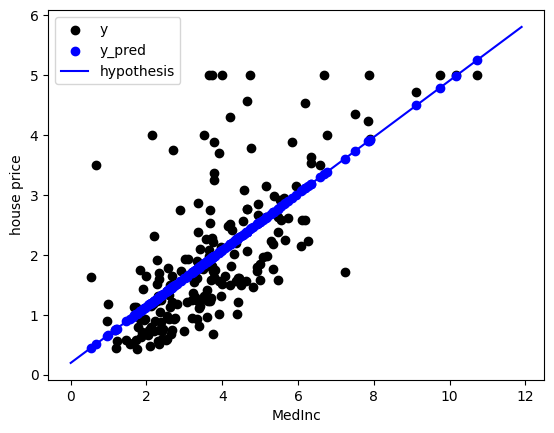

Mean squared error loss: 0.7154
R2 score: 0.4756


In [7]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# Use only one feature to start with for univariate linear regression - The Median Income
Xy_df = df[['MedInc','MedHouseVal']]

# So for this task we are going to be predicting the property value based on the Median Income

# prepare NumPy ndarrays
X_raw = np.array(Xy_df[['MedInc']])
y_raw = np.array(Xy_df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 200 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training data
obj.fit(X, y)

# Make predictions using the training data
y_pred = obj.predict(X)

# Plot outputs
plt.scatter(X, y,  color='black', label='y') # Observed y values
plt.scatter(X, y_pred, color='blue', label='y_pred') # predicted y values
plt.plot(np.r_[0:12:0.1], obj.predict(np.r_[0:12:0.1][:, np.newaxis]), color='blue', label='hypothesis') # Regression line
plt.xlabel('MedInc')
plt.ylabel('house price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y, y_pred)))


## 2.2 Multivariate example

It is actually very straightforward to expand this code to handle a multivariate model - all we need to do is add more feature columns to the `X` array and everything else will continue to work the same. Below I will add the `HouseAge` feature to the model.

In [8]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# Now using two features for multivariate linear regression - The Median Income and the House Age
Xy_df = df[['MedInc', 'HouseAge','MedHouseVal']]

# So for this task we are going to be predicting the property value based on the Median Income and the house age

# prepare NumPy ndarrays
X_raw = np.array(Xy_df[['MedInc', 'HouseAge']])  # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(Xy_df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 200 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training data
obj.fit(X, y)

# Make predictions using the training data
y_pred = obj.predict(X)

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y, y_pred)))


Mean squared error loss: 0.6571
R2 score: 0.5184


While still not a great model, we can see that the $R^2$ score has increased by a clear amount, so our two variable model is describing more of the variation than the univariate case. You may have noticed that in the code above I didn't output any graphs. When we move into multivariate cases we begin to encounter problems when it comes to visualising our results as we can only have one feature variable on the `x` axis. I have also removed the regression line for the plot, as we cannot really draw a multivariate regrerssion line that tells us much useful information in a 2D plane like this.

So we could make a graph of Median Income vs price:

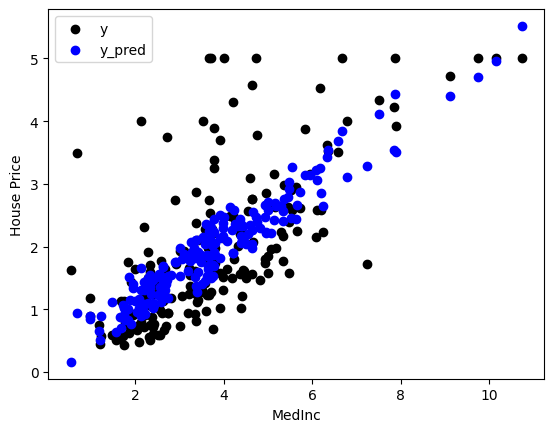

In [9]:
X_disp = X[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_disp, y,  color='black', label='y') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

Or the House Age vs the price:

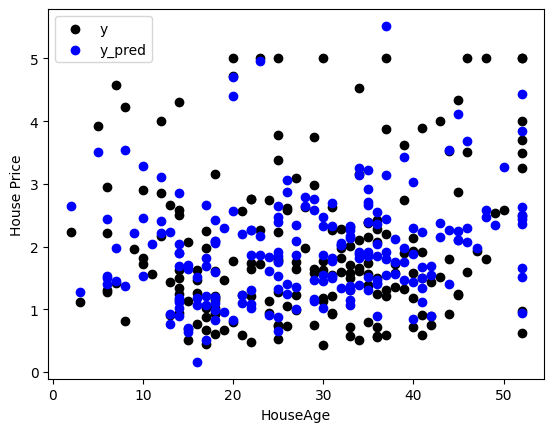

In [10]:
X_disp = X[:,1] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot


# Plot outputs
plt.scatter(X_disp, y,  color='black', label='y') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('HouseAge')
plt.ylabel('House Price')
plt.legend()
plt.show()

It is fine to keep an eye on how well you are predicting the target variables vs any of the features that you are using such as this, as providing your model is describing more of the variation, the predicted and true values should begin matching more closely. However, never forget that you are summarising a complex, multivariate relationship down to a simple set of 2D axes containing only one of those features, and while exploring multiple plots of different features can be a good exercise, it really isn't practical for more complex models.

While drawing a regression line isn't that helpful for a multivariate model, for a two featured model such as this we will in fact have a regression plane (or surface) that we can actually visualise (much like with the optimisation methods last week, going higher than this means things would have to be represented in higher dimensions which we can't easily visualise).

Below I have made a 3D plot which shows the true relationship for our fitted model of Income & House Age vs House Price. Try moving the plot around (the `ax.view_init` line) to get a better idea of how these three variables are related

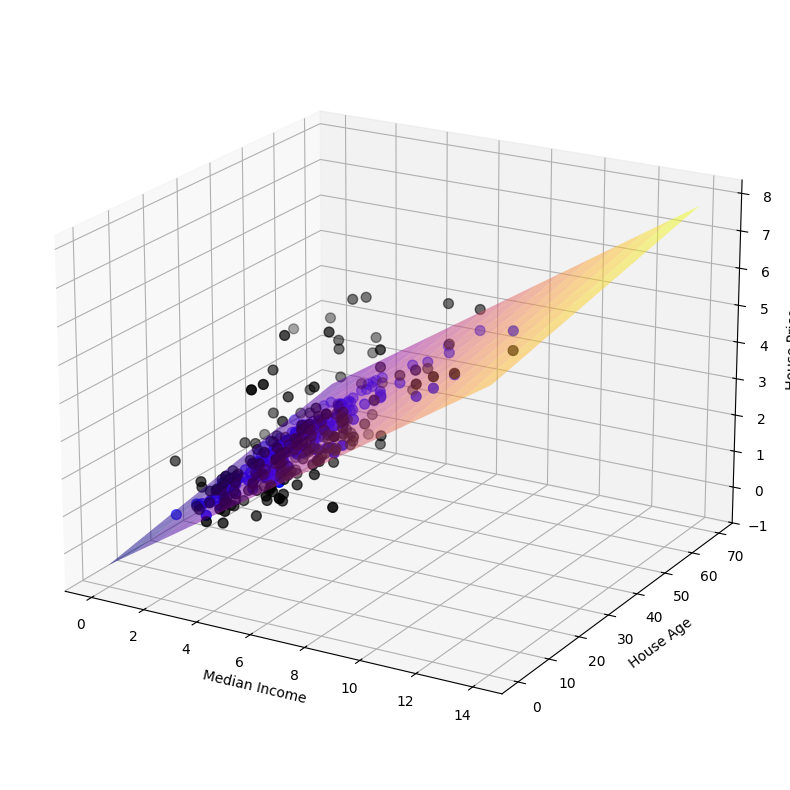

In [11]:
# Creating dataset
x_ax = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14]], dtype='f') # X value range
y_ax = np.array([[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]], dtype='f') # y value range
z = obj.intercept_+obj.coef_[0]*x_ax+obj.coef_[1]*y_ax # this is the function for the 2D regression surface, note that I am using the coefficients of our fitted model object

# Creating figure
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x_ax, y_ax, z, cmap="plasma", alpha=0.5) # Our regression surface

ax.scatter(X[:,0],X[:,1],y, c="black",s=50) # Training Data
ax.scatter(X[:,0],X[:,1],y_pred, c="blue",s=50) # Predicted Values

ax.view_init(elev=20, azim=300) # Change these variables to get a different view of the 3D plot

ax.set_xlabel("Median Income")
ax.set_ylabel("House Age")
ax.set_zlabel("House Price")

# show plot
plt.show()

### 2.2.1 Exercise 3

Try adding more features to the multivariate model for the California housing data.

1.   Try adding all of the features at once. How does the accuracy of this model compare to the previous models with less features?
2.   Now try adding (or taking away) features one at a time. Do they all contribute to the models accuracy?
3. Once you've chosen a final model, try increasing the size of your sample in increments (training and testing should both be increased approximately in proportion, this dataset has just over 20000 data points). Does the accuracy of your model change much? Is there anything concerning you spot about some of your predictions?



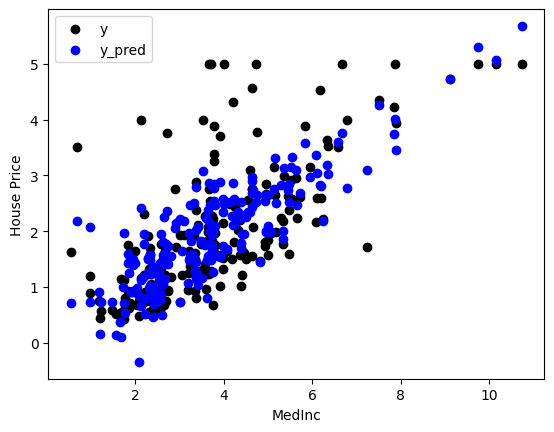

Mean squared error loss: 0.4650
R2 score: 0.6592


In [12]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

#col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
X_raw = np.array(df[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 200 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X, y)

# Make predictions using the testing set
y_pred = obj.predict(X)

X_disp = X[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_disp, y,  color='black', label='y') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y, y_pred)))

# 3. polynomial features


So far we have only considered linear relationships between our variables, however that is not always the case - considering the power of a variable (say $\theta_2^2$) or the interactions between variables (say $\theta_2 \theta_3$) may describe the relationship between the variables and the target more accurately than any linear combination of those variables is able too.

As a group these are known as *polynomial features*, and can be easily created in sklearn by creating a `sklearn.preprocessing.PolynomialFeatures` [instance](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures).


For the following examples we will continue using the California Housing Dataset, we will be going back to only considering `MedInc` as a feature to lower computational costs and make the examples clearer.

In [13]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# prepare NumPy ndarrays
X_raw = np.array(df[['MedInc']])  # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 50 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

##3.1 Initialising the Polynomial features:

Using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) is another preprocessing step, and is very similar to the feature scaling we looked at last week.

- Initialize the polynomial features object.
  - Method: `PolynomialFeatures(degree)`
  - Input parameter: Maximum polynomial degree you want for your model (this is really a hyperparameter we need to choose carefully, but we will cover how to best pick this degree next week).
- Output: Creates a new feature matrix with polynomial features.
  - Method: `poly.fit_transform`
  - Example: Let
  $$\begin{bmatrix} \tilde{\boldsymbol{x}}_{1} \end{bmatrix}
  = \begin{bmatrix} x_{1}^{(0)} \\ x_{1}^{(1)} \\ \vdots \\ x_{1}^{(m - 1)} \end{bmatrix}$$ be the feature matrix. Then, the feature matrix created by the instance `PolynomialFeatures(3)` is
  $$\begin{bmatrix} \tilde{\boldsymbol{x}}_{1} & (\tilde{\boldsymbol{x}}_{1})^2 & (\tilde{\boldsymbol{x}}_{1})^3 \end{bmatrix}
  = \begin{bmatrix} x_{1}^{(0)} & (x_{1}^{(0)})^2 & (x_{1}^{(0)})^3 \\ x_{1}^{(1)} & (x_{1}^{(1)})^2 & (x_{1}^{(1)})^3 \\ \vdots & \vdots & \vdots \\ x_{1}^{(m - 1)} & (x_{1}^{(m - 1)})^2 & (x_{1}^{(m - 1)})^3 \end{bmatrix}$$


In [14]:
degree = 3 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_poly = poly.fit_transform(X) # Fit the poly object to the training data to make a new feature matrix
print(X_poly) # View the new feature matrix - do you understand what's happening?

[[1.00000000e+00 3.36870000e+00 1.13481397e+01 3.82284782e+01]
 [1.00000000e+00 2.16600000e+00 4.69155600e+00 1.01619103e+01]
 [1.00000000e+00 1.56420000e+00 2.44672164e+00 3.82716199e+00]
 [1.00000000e+00 3.68850000e+00 1.36050322e+01 5.01821615e+01]
 [1.00000000e+00 9.74490000e+00 9.49630760e+01 9.25405679e+02]
 [1.00000000e+00 1.68330000e+00 2.83349889e+00 4.76962868e+00]
 [1.00000000e+00 3.37130000e+00 1.13656637e+01 3.83170620e+01]
 [1.00000000e+00 4.64630000e+00 2.15881037e+01 1.00304806e+02]
 [1.00000000e+00 3.97500000e+00 1.58006250e+01 6.28074844e+01]
 [1.00000000e+00 7.90130000e+00 6.24305417e+01 4.93282439e+02]
 [1.00000000e+00 5.54560000e+00 3.07536794e+01 1.70547604e+02]
 [1.00000000e+00 2.73610000e+00 7.48624321e+00 2.04831100e+01]
 [1.00000000e+00 2.08020000e+00 4.32723204e+00 9.00150809e+00]
 [1.00000000e+00 4.39770000e+00 1.93397653e+01 8.50504858e+01]
 [1.00000000e+00 2.70720000e+00 7.32893184e+00 1.98408843e+01]
 [1.00000000e+00 2.04690000e+00 4.18979961e+00 8.576100

## 3.2 Fit `sklearn`'s `LinearRegression` instance to the polynomial features.
We can fit a regression model the same as we did for our multivariable models earlier.

Note that this time we're using `fit_intercept=False` as fitting the polynomial features gives us a column of $1$'s by default, which will add a constant contribution.


In [15]:
reg = sklearn.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_poly, y)

LinearRegression(fit_intercept=False)

## 3.3 Make prediction on the fitted object on the new data using polynomial features.

We can make predictions with our polynomial features in the same way that we used for the multivariable model.

In [16]:
y_pred = reg.predict(X_poly) # Store our predictions
display(y_pred) # Display our predicted values

array([1.49278727, 1.26011832, 1.26526712, 1.60034748, 4.76728696,
       1.25698658, 1.49359282, 2.01146352, 1.71033141, 3.87598782,
       2.48791934, 1.33363521, 1.25541   , 1.89348387, 1.32822551,
       1.25405387, 3.48890724, 1.44493347, 2.06813097, 2.01082864,
       1.3191393 , 1.48424724, 1.49474118, 2.19459304, 1.571946  ,
       2.59301951, 2.44202701, 1.27105172, 1.29753067, 1.52574629,
       1.63116847, 1.68935123, 1.25146502, 1.45476272, 1.4414356 ,
       1.2738353 , 1.26457937, 1.74758836, 4.90975026, 1.39079887,
       1.64313481, 2.89781583, 1.87900229, 4.50901838, 1.56828444,
       1.68792153, 1.45087809, 1.25164454, 1.88306874, 1.62477677])

## 3.4 What is our cost function for the training data?
How much of the variation in our training data is being described by our model with polynomial features? We can check this by making a prediction with our training data and calculating the mean squared error against the `y_train` and the $R^2$ score. We should see that we are describing quite a lot of variation with just this one feature now.



In [17]:
y_pred = reg.predict(X_poly) # Make our predictions of the training data
mse = sklearn.metrics.mean_squared_error(y, y_pred) # calculate the MSE
print(mse)
R2 = sklearn.metrics.r2_score(y, y_pred) # calculate the MSE
print(R2)

0.5900912539789069
0.5801267857667527


Let's try plotting this and see what our hypothesis looks like based on the polynomial feature.

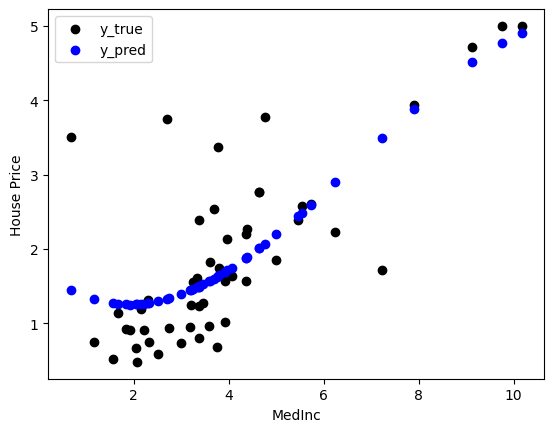

In [18]:
# Plot outputs
plt.scatter(X[:,0], y,  color='black', label='y_true') # Observed y values
plt.scatter(X[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

This looks good, can we get an even better fit using a higher degree of polynomial features?

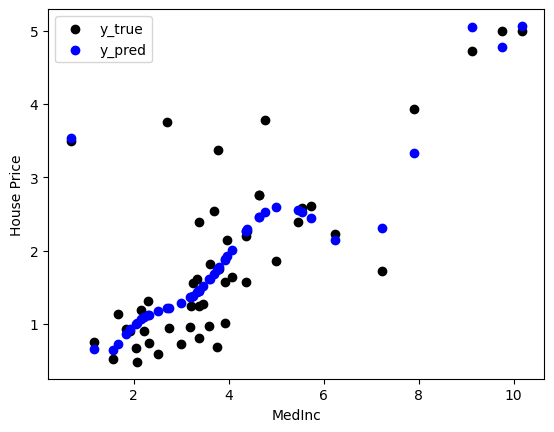

Mean squared error loss: 0.3874
R2 score: 0.7243


In [19]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

# prepare NumPy ndarrays
X_raw = np.array(df[['MedInc']])
y_raw = np.array(df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 50 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

degree = 9 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_poly = poly.fit_transform(X) # Fit the poly object to the training data to make a new feature matrix

reg = sklearn.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_poly, y)

y_pred = reg.predict(X_poly) # Store our predictions

# Plot outputs
plt.scatter(X[:,0], y,  color='black', label='y_true') # Observed y values
plt.scatter(X[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()


# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y, y_pred)))

This is looking pretty good, with 72% accuracy. But with a single variable, we can only ever have a single line representing the relationships, which limits what can be done. If we make the model multi-variate we should be able to go even higher!

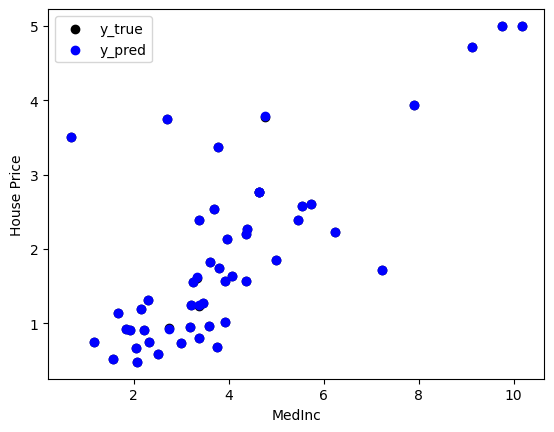

Mean squared error loss: 0.0000
R2 score: 1.0000


In [20]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# Combine the X and y for visualisation
XY_pd = pd.concat([X_pd, y_pd], axis=1)

# Shuffle dataset for a random sample, as we will not be using the entire dataset
rng = np.random.default_rng(0) # This sets the random seed, meaning that we will get the SAME random sample if we rerun this cell.
df = XY_pd.iloc[rng.permutation(len(XY_pd))].reset_index(drop=True) # Shuffle data

col = list(X_pd) # prepare NumPy ndarrays

X_raw = np.array(df[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(df['MedHouseVal'])

# Define how much data we want. You can try changing these later to see how it changes the model and predictions
n = 50 # This is the data that will be used to train our model.

# Split the feature data into our sample
X = X_raw[:n] # This will select the data points from 0 to the number defined in n (200 in this case)

# Split the target data into our sample
y = y_raw[:n]

degree = 9 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree) # Create the polynomial features object
X_poly = poly.fit_transform(X) # Fit the poly object to the training data to make a new feature matrix

reg = sklearn.linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_poly, y)

y_pred = reg.predict(X_poly) # Store our predictions

# Plot outputs
plt.scatter(X[:,0], y,  color='black', label='y_true') # Observed y values
plt.scatter(X[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y, y_pred)))

## 3.7 **Important** - Polynomial feature drawbacks (Overfitting)

So, this looks pretty great right? Are polynomial features the key to all our problems? I was able to get a model with 100% accuracy!

But remember, we have been using the **training data** to evaluate our accuracy for the last few exercises. What happens if we try and test the model above against **new data**, that the model hasn't seen yet?

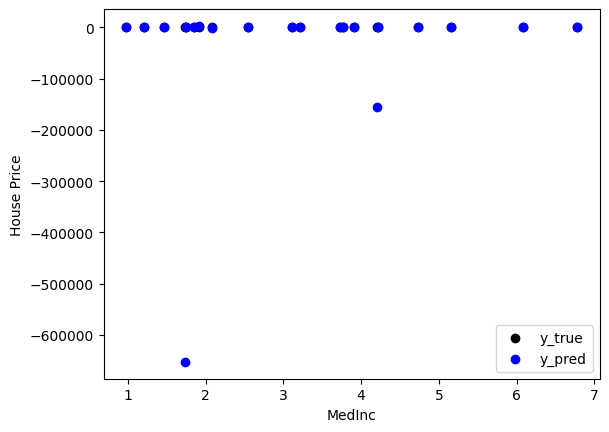

Mean squared error loss: 22486800729.0436
R2 score: -13083598089.7543


In [21]:
n_new = 20
X_new = X_raw[n:n+n_new] # Pick our new data points
X_new_poly = poly.fit_transform(X_new) # create Polynomial features for X_new
y_true = y_raw[n:n+n_new] # Pick our new target values
y_pred = reg.predict(X_new_poly) # Store our predictions

# Plot outputs
plt.scatter(X_new[:,0], y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new[:,0], y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))

Well, that's disappointing. Our model is terrible. Really terrible. We would be much better off with univariate linear regression.

We have **overfit** our data - our model has been fine tuned to perfectly pick up all of the noise in the training data, which gets impressive $R^2$ scores when making predictions for the training data, but means that our model utterly fails to make accurate predictions for new data.

Do not despair, while there is no silver bullet, there are ways to make use of the power of polynomial features and multivariate models without overfitting our model. We will be exploring the methods for accurately validating your model and to prevent it from overfitting the data next week.

Just remember:

<font color="red">A high degree of polynomial features can lower the the MSE greatly against the training data. However, a low error on the training data is not always desirable, since this does not tell us anything about the performance when making predictions using new data.</font>

# 4. Data Splitting

So far in the tutorials we have exclusively been using a single set of data to fit and evaluate our models. As has been alluded to a few times so far (and should have been explained in your lecture) this is terrible practice!

Thee are many ways you can get a model to fit data more and more accurately, but if this is just fitting random variation ('noise') in the data rather than the true relationships (the 'signal') then the model will be **useless** in practice, regardless of how accurate the $R^2$ score may be on the data it was fit on.

So, how do we make sure our model is behaving well in reality?
We split our data into two sets, and hold back a small set that the model never sees during training for evaluation purposes. This mimics the scenario from reality, where your model will have to make predictions from unseen data. However, unlike this scenario in production, with this held back 'test' data, we still have target data we can use to obtain a (more accurate) evaluation of our predictions.

From this point forward you should always be using proper data splitting with your ML models and you should always report your model accuracy on unseen 'test' data to give the most reliable indication of the models performance.

##4.1 Data Splitting Example

To start with we want to load our data (using California housing again!) in as normal:

In [22]:
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

But then we can use a new library from `sklearn` called `train_test_split`, which actually simplifies some things for us compared to what we were doing.

In [23]:
# First import new library from sklearn
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us

# prepare NumPy ndarrays
col = ['MedInc', 'HouseAge']
X_raw = np.array(X_pd[col])
y = y_pd.to_numpy()

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with the remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)

Let's just have a sanity test that the arrays are the size we expect:

In [24]:
print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)

X_train size: (16512, 2)
X_test size: (4128, 2)


However, we can also use this method to split with explicit numbers if we don't want to use the entire dataset (which can be useful for big data cases, or just for testing models quickly), like so:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, train_size=500, test_size=100, shuffle=True, random_state=0)
print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)

X_train size: (500, 2)
X_test size: (100, 2)


We can create the model object and fit is as normal - but remember this time we are only fitting the model ont the training data

In [26]:
# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training data
obj.fit(X_train , y_train)

LinearRegression()

We can evaluate this training model as normal if we like:

In [27]:
# Make predictions using the training data
y_pred = obj.predict(X_train)

print('Training evaluation:')
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_train, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_train, y_pred)))

Training evaluation:
Mean squared error loss: 0.8053
R2 score: 0.4459


But what we are really interested in is the performance on the new 'test' data.

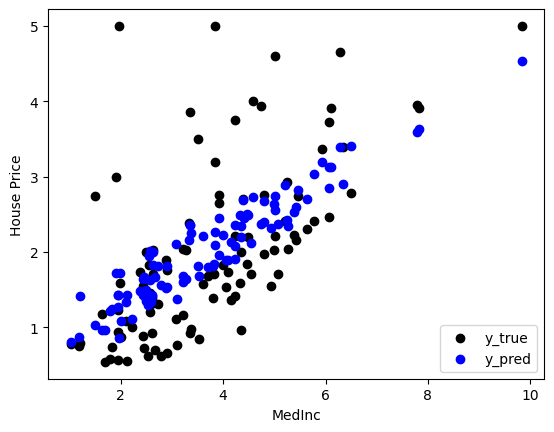

Test data evaluation:
Mean squared error loss: 0.7610
R2 score: 0.4053


In [28]:
# Make predictions using the test data
y_pred = obj.predict(X_test)

X_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

print('Test data evaluation:')
# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

And just for interest, I've made a new 3D plot showing the relationship between house age, the median income and median house price. Black dots are the training data, blue the predicted values and red the observed 'test' values.

It's a bit of a mess to look at with the whole dataset, so you may want to try rerunning the above with a smaller sample and mess around with the 'view' parameters `elev` and `azim` to move the plot in 3D space.

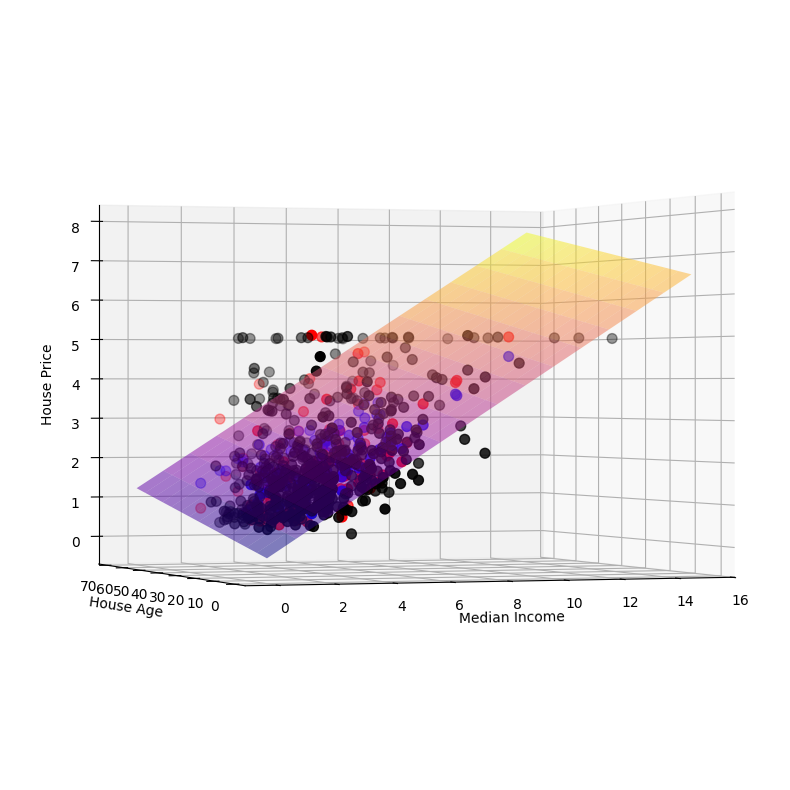

In [29]:
# Creating dataset
x_ax = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15]], dtype='f') # X value range
y_ax = np.array([[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]], dtype='f') # y value range
z = obj.intercept_+obj.coef_[0]*x_ax+obj.coef_[1]*y_ax # this is the function for the 2D regression surface, note that I am using the coefficients of our fitted model object

# Creating figure
fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x_ax, y_ax, z, cmap="plasma", alpha=0.5) # Our regression surface

ax.scatter(X_train[:,0],X_train[:,1],y_train, c="black",s=50) # Training Data
ax.scatter(X_test[:,0],X_test[:,1],y_test, c="red",s=50) # True Values
ax.scatter(X_test[:,0],X_test[:,1],y_pred, c="blue",s=50) # Predicted Values

ax.view_init(elev=0, azim=250) # Change these variables to get a different view of the 3D plot

ax.set_xlabel("Median Income")
ax.set_ylabel("House Age")
ax.set_zlabel("House Price")

# show plot
plt.show()

In this case our training model wasn't too bad, only having a minor change in accuracy. But as we saw with our polynomial example that isn't always the case!


## 4.2 Exercise 4
Try making a multi-variable regression model for the California housing dataset that uses all of the features and correct data splitting. How does the accuracy compare with the training data only prediction (Section 2.2).

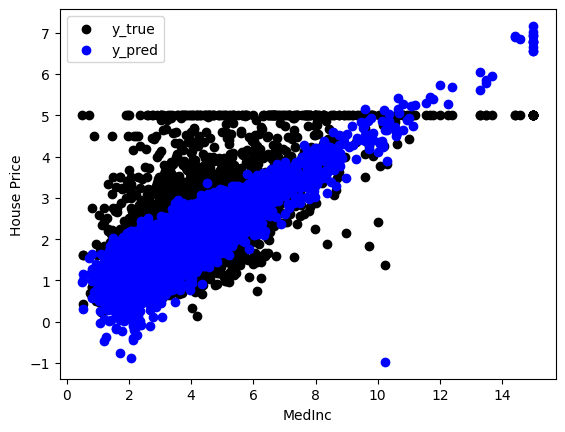

Mean squared error loss: 0.5290
R2 score: 0.5943


In [30]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)


# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

##4.2 Exercise 5

Try fitting some models for the diabetes dataset we used last week (`sklearn.datasets.load_diabetes`) using proper data splitting for the following models


*   Univariate Regression
*   Multivariate Regression
*   Non-parametric Regression Models ([K-nearest Neighbour Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor), [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor))

Consider how your results compare with your results for similar problems in  [Tutorial 2](https://colab.research.google.com/drive/1gpTWdTOjxP53WUycdjIjr5rA2jlVgVOH?usp=sharing) where you used the training data only.


In [31]:
##############################################################
# Your code here
##############################################################

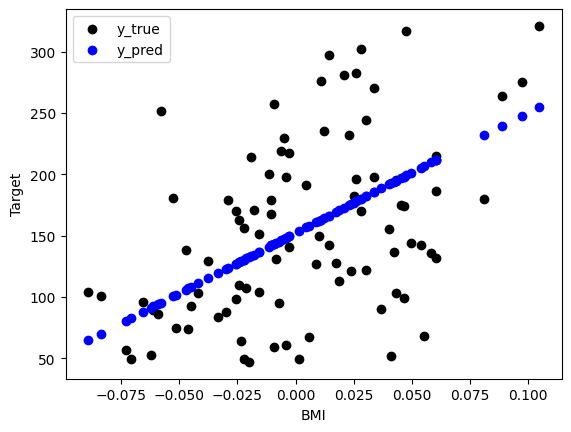

Mean squared error loss: 4150.6802
R2 score: 0.1906


In [32]:
##############################################################
# Your code here
##############################################################

# Univariate regression

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = ['bmi'] # prepare NumPy ndarrays

X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)


# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

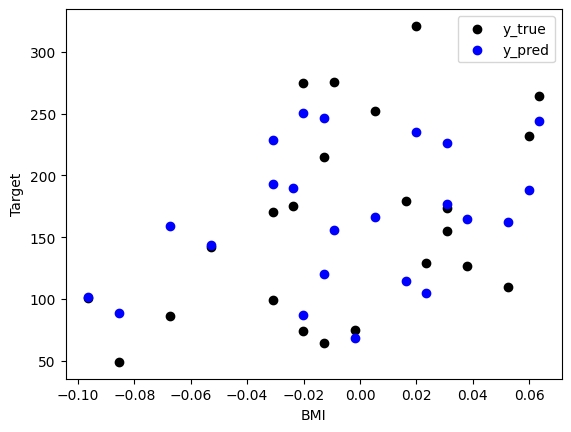

Mean squared error loss: 3248.6989
R2 score: 0.4446


In [33]:
##############################################################
# Your code here
##############################################################

# Multivariate regression

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.05, shuffle=True, random_state=0)


# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

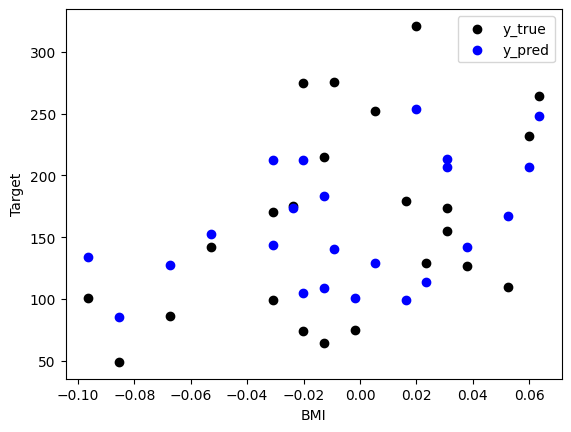

Mean squared error loss: 3469.7683
R2 score: 0.4068


In [34]:
##############################################################
# Your code here
##############################################################
from sklearn.neighbors import KNeighborsRegressor #Import the Knn library for the regression model

# KNN regression

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.05, shuffle=True, random_state=0)


# Create Knn regression object
obj = KNeighborsRegressor(n_neighbors=10)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

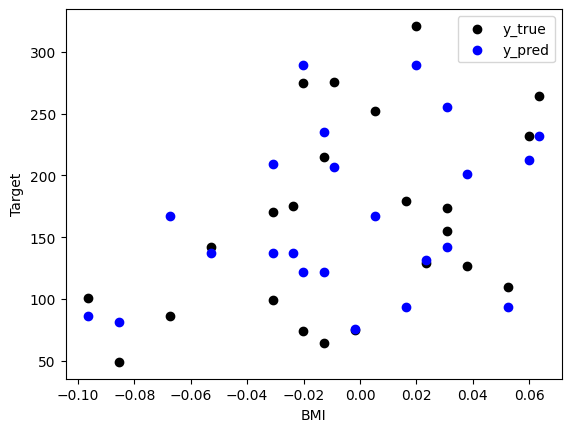

Mean squared error loss: 2926.0899
R2 score: 0.4997


In [35]:
##############################################################
# Your code here
##############################################################
from sklearn import tree #Import the Decision Tree library for the regression model

# DT regression

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.05, shuffle=True, random_state=0)


# Create Knn regression object
obj = tree.DecisionTreeRegressor(max_depth=5, min_samples_split =10, min_samples_leaf=10)
obj = tree.DecisionTreeRegressor(max_depth=20, min_samples_split =10, min_samples_leaf=10)

# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))

##3.8 Exercise 6
Try and implement a multivariate model with polynomial features on the California housing dataset that provides a good prediction but does not overfit the new data. You might also want to try changing some of the other parameters for the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) object. In particular using `interaction_only=true` will only give you only polynomial interactions (so $AB$ will be included but not $A^2$ or $B^2$).This may take a lot of experimentation with features and polynomial degrees to get anything better than just the baseline multivariate model. Don't worry next week we will see some methods that will automate this process for us.

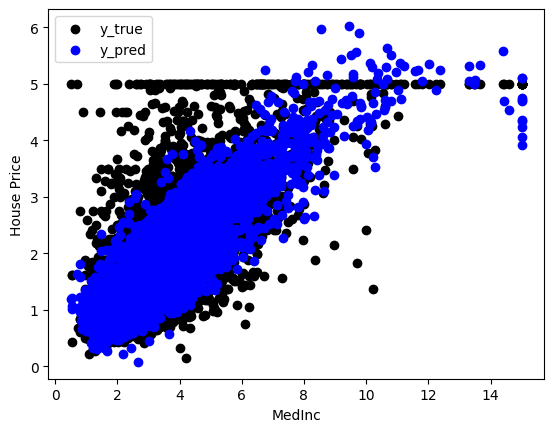

Mean squared error loss: 0.4755
R2 score: 0.6353


In [36]:
##############################################################
# Your code here
##############################################################

# Load the house price dataset
X_pd, y_pd = sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=True)

# So for this task we are going to be predicting the property value based on the Median Income
col = list(X_pd) # prepare NumPy ndarrays

# All columns deg=1 0.59

col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
col = ['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']# prepare NumPy ndarrays
col = ['MedInc', 'HouseAge', 'Latitude', 'Longitude']# prepare NumPy ndarrays
X_raw = np.array(X_pd[col]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y_raw = np.array(y_pd)

# Split the data into training/test data
# We have 20640 pairs of a feature and target, we use 20% only for the test, with teh remainder in the training set.
# this can shuffle our data for us while we split using shuffle=True, and the random_state allows us to perform an identical pseudorandom shuffle each time.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.20, shuffle=True, random_state=0)

degree = 3 # Define the maximum power of polynomial features you want to include
poly = PolynomialFeatures(degree, interaction_only=False) # Create the polynomial features object
X_train_poly = poly.fit_transform(X_train) # Fit the poly object to the training data to make a new feature matrix
X_test_poly = poly.fit_transform(X_test)

# Create linear regression object
obj = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
obj.fit(X_train_poly, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_test_poly)

X_test_disp = X_test[:,0] # We will need to make a special vector for the feature we want on the x axis, as now X is a matrix matplotlib can't use it for a scatter plot

# Plot outputs
plt.scatter(X_test_disp, y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_disp, y_pred, color='blue', label='y_pred') # predicted y values
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))